In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",45)
%matplotlib inline

In [2]:
#kdd_diff_level_train = pd.read_pickle("dataset/kdd_diff_level_train.pkl")
#kdd_diff_level_test = pd.read_pickle("dataset/kdd_diff_level_test.pkl")
#output_columns_2labels = ['Normal','Attack']
output_columns_2labels = ['Attack','Normal']
actual_value = pd.read_pickle("dataset/kdd_test_2labels_y.pkl");


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=4)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    label = [["\n True Positive", "\n False Negative \n Type II Error"],
             ["\n False Positive \n Type I Error", "\n True Negative"]
            ]
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, "{} {}".format(cm[i, j].round(4), label[i][j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot(pred_value):
    from sklearn.metrics import confusion_matrix

    cm_2labels = confusion_matrix(y_pred = pred_value, y_true = actual_value)
    plt.figure(figsize=[6,6])
    plot_confusion_matrix(cm_2labels, output_columns_2labels, normalize = True)

In [4]:
def get_count(pred_value):
    difficulty = pd.DataFrame({"Actual":actual_value, "Predict":pred_value, "difficulty_level":kdd_diff_level_test})
    #difficulty = pd.concat(difficulty, pd.Data)
    difficulty['accuracy'] = None
    difficulty.ix[difficulty.Actual == difficulty.Predict, "accuracy"] = 'Correct'
    difficulty.ix[difficulty.Actual != difficulty.Predict, "accuracy"] = 'Incorrect'
    diff_group = difficulty.loc[:,["difficulty_level", "accuracy", "Predict"]].groupby(["difficulty_level", "accuracy"])
    total_correct = sum(difficulty.Actual == difficulty.Predict)
    total_records = difficulty.shape[0]
    total_incorrect = total_records - total_correct
    print("Total Records:{}".format(total_records))
    return diff_group.count()

In [5]:
def evaluate(pred_pkl, score_pkl):
    predictions = pd.read_pickle(pred_pkl)
    scores = pd.read_pickle(score_pkl)

    print(scores.sort_values("test_score", ascending=False))

    df_sorted = scores.sort_values("test_score", ascending=False).iloc[0,0:3]
    epoch = int(df_sorted['epoch'])
    n_o_f = int(df_sorted['no_of_features'])
    h_l = int(df_sorted['hidden_layers'])
    df_pred = predictions["{}_{}_{}".format(epoch,n_o_f,h_l)] #.round(2)
    Attack_index = actual_value == 0
    Normal_index = actual_value == 1

    #df_pred[Attack_index].plot(kind='line', figsize=(20,5), title="Prediction of Attack")
    #df_pred[Normal_index].plot(kind='line', figsize=(20,5), title="Prediction of Normal")
    
    
    pred_value = np.argmax(df_pred.values, axis=1)
    plot(pred_value)

# Evaluating Dense Network

    epoch  no_of_features  hidden_layers  train_score  test_score
27    100              32              6     0.934672    0.904010
26    100              32              6     0.936180    0.903744
25    100              32              6     0.930148    0.903167
24    100              32              6     0.925703    0.897090
23    100              32              6     0.921416    0.890747
22    100              64              4     0.833386    0.884493
21    100               4              4     0.956660    0.835832
20    100               4              4     0.954517    0.835566
19    100               4              4     0.954437    0.834989
18    100               4              4     0.948484    0.834457
17    100               4              4     0.949119    0.833171
16    100               4              4     0.948087    0.832505
15    100               4              4     0.947928    0.831707
14    100               4              4     0.944515    0.830066
13    100 

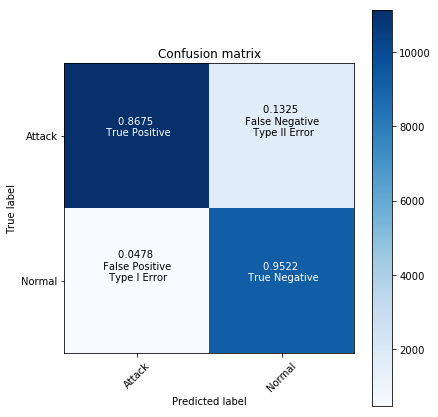

In [6]:
evaluate("dataset/tf_dense_only_nsl_kdd_predictions.pkl",
         "dataset/tf_dense_only_nsl_kdd_scores.pkl")

In [7]:
#get_count(pred_value)
#dense_only_predictions

# Evaluating VAE with Softmax - Trained Together

    epoch  no_of_features  hidden_layers  train_score  test_score
11      2              32              6     0.919825    0.872605
10      2              16              6     0.900139    0.842220
7       2              32              4     0.896170    0.834856
0       2               4              2     0.858186    0.822835
4       2               4              4     0.857829    0.821993
2       2              16              2     0.918793    0.820795
3       2              32              2     0.893669    0.817512
1       2               8              2     0.900536    0.795289
5       2               8              4     0.919428    0.766856
9       2               8              6     0.868188    0.753859
6       2              16              4     0.732209    0.709768
8       2               4              6     0.648343    0.627174
Normalized confusion matrix
[[ 0.8378  0.1622]
 [ 0.0814  0.9186]]


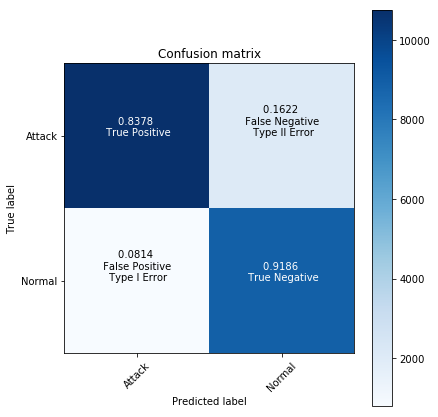

In [8]:
evaluate("dataset/tf_vae_dense_trained_together_nsl_kdd_predictions.pkl",
         "dataset/tf_vae_dense_trained_together_nsl_kdd_scores.pkl")

# Evaluating VAE with Label using VAE Loss

   epoch  no_of_features  hidden_layers  train_score  test_score
5      5               8              4     0.912605    0.849273
4      5               4              4     0.897682    0.839336
3      5              32              2     0.924274    0.806068
0      5               4              2     0.928243    0.793604
1      5               8              2     0.923718    0.788103
2      5              16              2     0.946579    0.778034
6      5              16              4     0.912050    0.752972
7      5              32              4     0.904985    0.731946
Normalized confusion matrix
[[ 0.7968  0.2032]
 [ 0.0814  0.9186]]


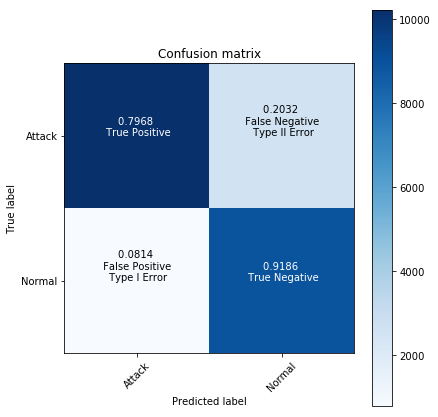

In [13]:
evaluate("dataset/tf_vae_only_vae_loss_nsl_kdd_predictions.pkl",
         "dataset/tf_vae_only_vae_loss_nsl_kdd_scores.pkl")

# Evaluating VAE with Label using MSE Loss

   epoch  no_of_features  hidden_layers  train_score  test_score
7      5              32              4     0.921178    0.867681
4      5               4              4     0.942927    0.859741
5      5               8              4     0.953247    0.832062
2      5              16              2     0.966185    0.798838
6      5              16              4     0.960867    0.798793
1      5               8              2     0.967138    0.789035
0      5               4              2     0.961264    0.787660
3      5              32              2     0.936498    0.785885
Normalized confusion matrix
[[ 0.7937  0.2063]
 [ 0.0346  0.9654]]


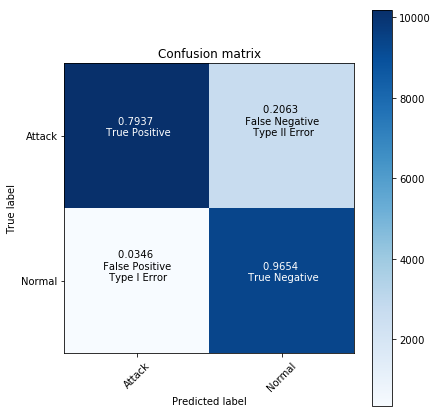

In [12]:
evaluate("dataset/tf_vae_only_nsl_kdd_predictions.pkl",
         "dataset/tf_vae_only_nsl_kdd_scores.pkl")